# Quantitative Analysis of Stock Market

## Dataset Overview
The provided dataset serves as a valuable resource for conducting thorough quantitative analysis, offering comprehensive insights into market trends and stock behavior. Here are the key features of the dataset:

- **Ticker**: The stock ticker symbol. Each publicly traded stock in the market has a unique symbol that identifies it. For instance, AAPL for Apple.

- **Date**: The specific trading date. It denotes the date when the stock prices were recorded.

- **Open**: The opening price of the stock for the day. It represents the price at which the stock commenced trading at the beginning of the trading day.

- **High**: The highest price point of the stock during the day. It signifies the highest price the stock has reached during the trading day.

- **Low**: The lowest price point of the stock during the day. It indicates the lowest price the stock has dipped to during the trading day.

- **Close**: The closing price of the stock. It reflects the price at which the stock was traded at the end of the trading day.

- **Adj Close**: The adjusted closing price. Sometimes, closing prices are adjusted to account for corporate events such as stock splits or dividends. The adjusted closing price reflects these adjustments.

- **Volume**: The total trading volume of the stock during the day. It represents the total quantity of shares that have been traded during the trading day.

## Import Libraries

In [1]:
# Data
import json
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Visual
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# ML
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error,make_scorer,r2_score, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from joblib import dump
from statsmodels.tsa.arima.model import ARIMA # <---- Predict
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose


## Load Data

In [2]:
df = pd.read_csv("/kaggle/input/stock-market-analysis/stocks.csv")
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [3]:
def get_info_df(df):
    # Información básica sobre el DataFrame
    df_info = pd.DataFrame({'Column': df.columns,
                            'No_Nulls': df.notnull().sum().values,
                            'No_Unique': df.nunique().values,
                            'Type': df.dtypes.values},
                           index=range(1, len(df.columns)+1))
    
    return df_info
get_info_df(df)

,Column,No_Nulls,No_Unique,Type
1,Ticker,248,4,object
2,Date,248,62,object
3,Open,248,244,float64
4,High,248,248,float64
5,Low,248,248,float64
6,Close,248,244,float64
7,Adj Close,248,244,float64
8,Volume,248,248,int64


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08


In [5]:
df.Ticker.value_counts()

Ticker
AAPL    62
MSFT    62
NFLX    62
GOOG    62
Name: count, dtype: int64

In [6]:
df['Date'] = pd.to_datetime(df['Date'])


## Time Series Analysis¶

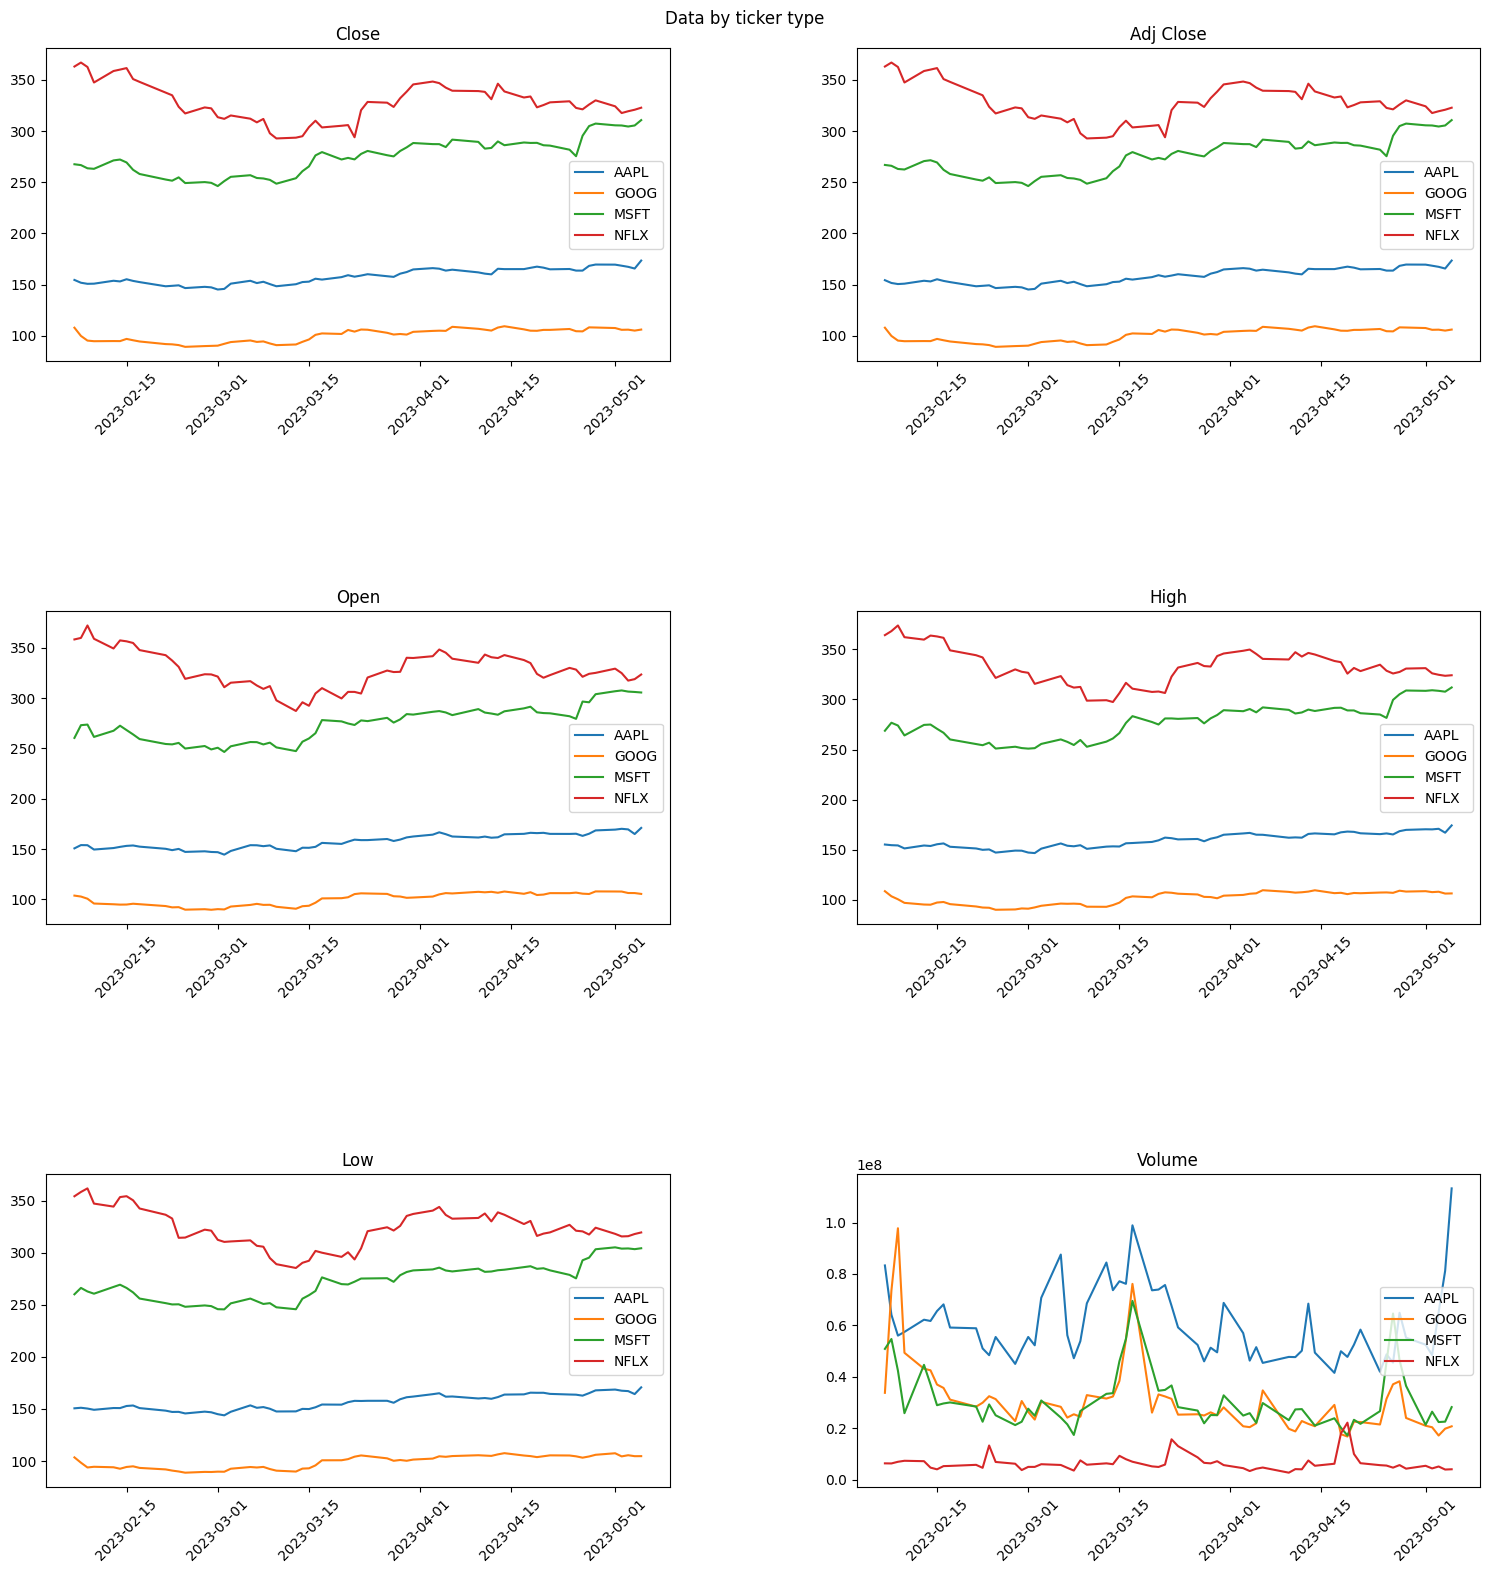

In [7]:
fig, axs = plt.subplots(3, 2, figsize=(15, 16))
fig.suptitle('Data by ticker type')
cols = ['Close', 'Adj Close','Open', 'High', 'Low', 'Volume']
for i,col in enumerate(cols):
    row = i // 2
    col = i % 2
    for ticker, data in df.groupby('Ticker'):
        axs[row, col].plot(data['Date'], data[cols[i]], label=ticker)
    axs[row, col].set_title(cols[i])
    axs[row, col].legend(loc='right')
    axs[row, col].tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.8)
plt.show()

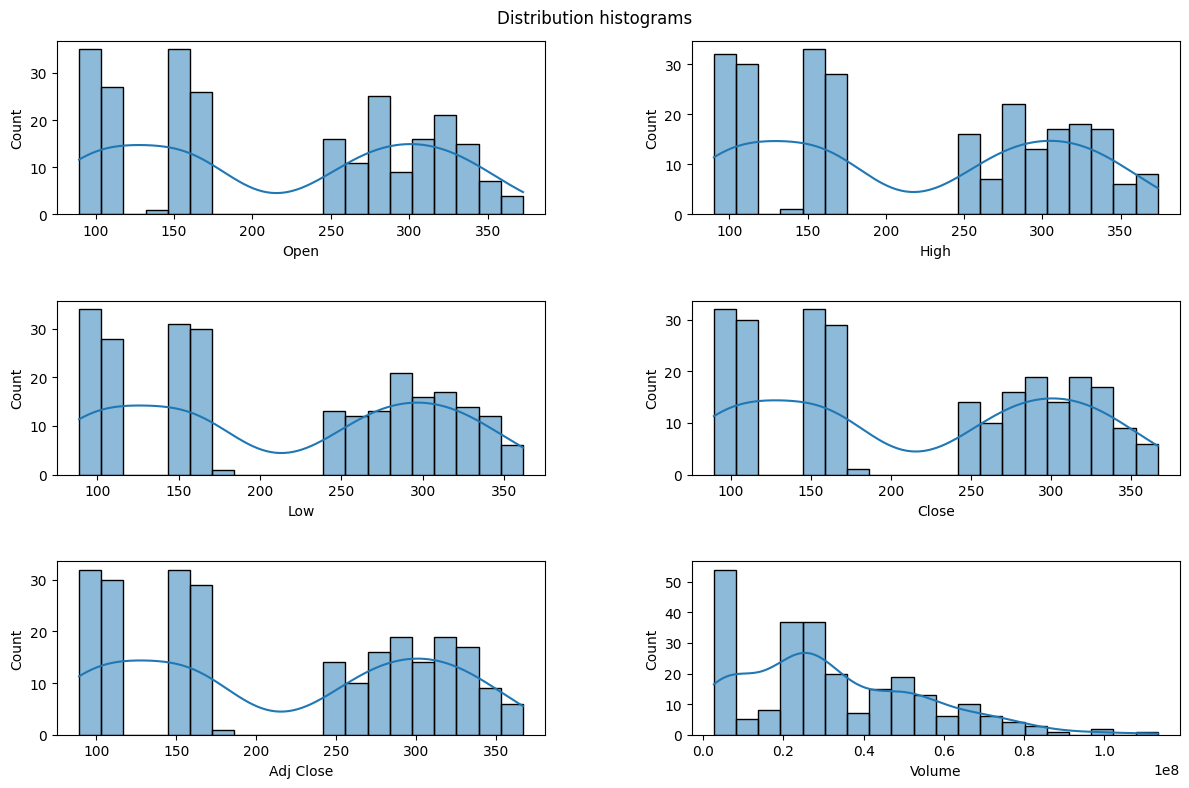

In [8]:
cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
fig, axs = plt.subplots(3, 2, figsize=(12, 8))
fig.suptitle('Distribution histograms')

for i in range(len(cols)):
    row = i // 2
    col = i % 2
    sns.histplot(df[cols[i]], bins=20, kde=True, ax=axs[row, col])

plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

In [9]:
# for the metrics in posteriory
grouped_ticker_close = df.pivot_table(index='Date', columns='Ticker', values='Close')

## Volatility Assessment

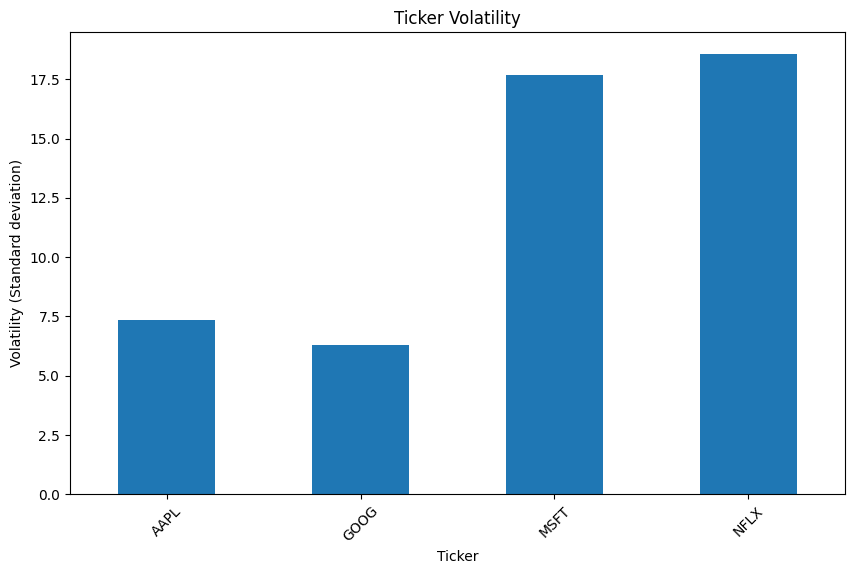

In [10]:
volatility = grouped_ticker_close.std()

plt.figure(figsize=(10, 6))
volatility.plot(kind='bar')
plt.title('Ticker Volatility')
plt.xlabel('Ticker')
plt.ylabel('Volatility (Standard deviation)')
plt.xticks(rotation=45)
plt.show()

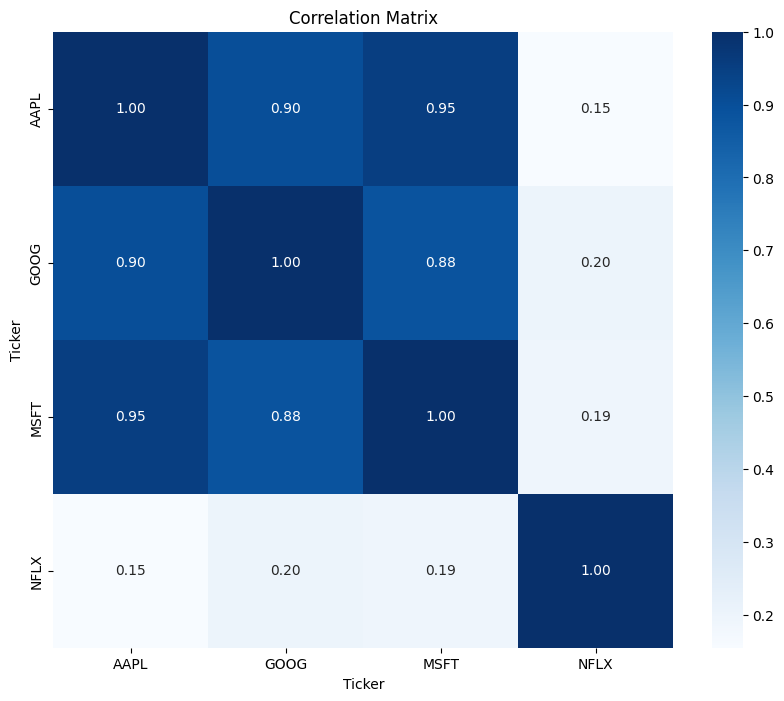

In [11]:
correlation_matrix = grouped_ticker_close.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Interpretation:**

- There is a very high and positive correlation between the closing prices of **AAPL and GOOG (0.901662)**. This suggests that the price movements of these two stocks tend to be closely synchronized. Investors may observe this relationship when making investment decisions, as price movements in one stock can influence the other.
- The correlation between **AAPL and MSFT is even stronger than that of AAPL and GOOG**, with a coefficient of **0.953037**. This indicates a very close relationship between the closing prices of these two stocks. Investors interested in AAPL may also consider closely monitoring the performance of MSFT due to this high correlation.

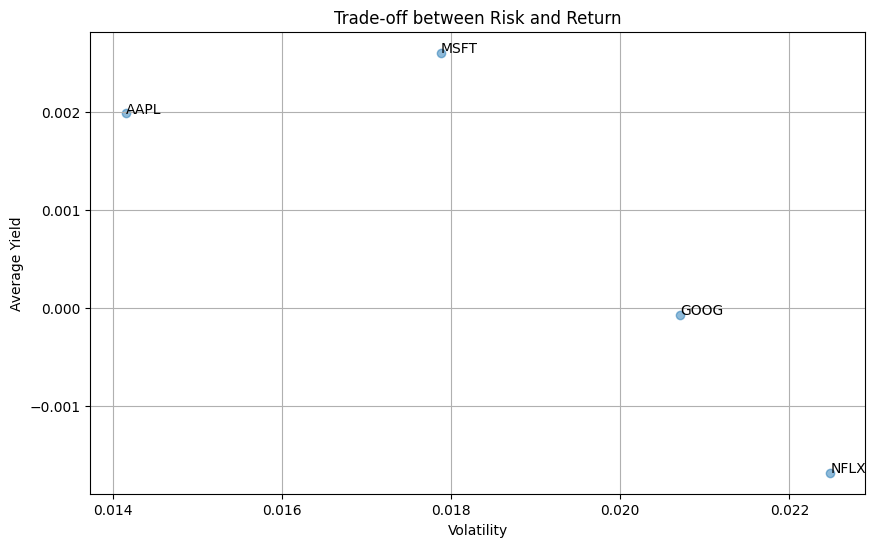

In [12]:
df['Daily Return'] = df.groupby('Ticker')['Close'].pct_change()

volatility = df.groupby('Ticker')['Daily Return'].std()

risk_return_df = pd.DataFrame({'Volatility': volatility,
                               'Average Return': df.groupby('Ticker')['Daily Return'].mean()})

plt.figure(figsize=(10, 6))
plt.scatter(risk_return_df['Volatility'], risk_return_df['Average Return'], alpha=0.5)

for ticker, row in risk_return_df.iterrows():
    plt.text(row['Volatility'], row['Average Return'], ticker)

plt.title('Trade-off between Risk and Return')
plt.xlabel('Volatility')
plt.ylabel('Average Yield')
plt.grid(True)
plt.show()

## Specific Analysis for AAPL

### Seasonality and Autocorrelation

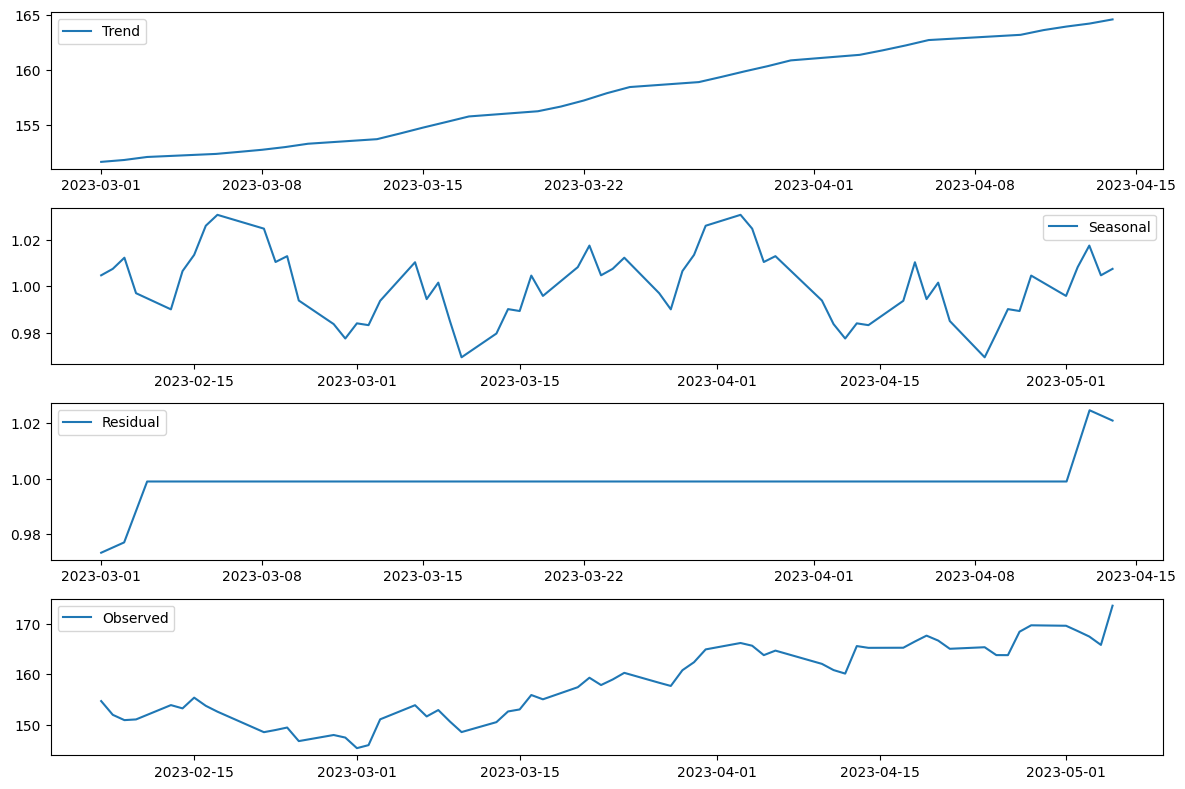

In [13]:
df_apple = df[df['Ticker'] == 'AAPL']
df_apple = df_apple[["Close","Date"]]
result = seasonal_decompose(df_apple['Close'], model='multiplicative', period=30)

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df_apple['Date'], result.trend, label='Trend')
plt.legend()
plt.subplot(412)
plt.plot(df_apple['Date'], result.seasonal, label='Seasonal')
plt.legend()
plt.subplot(413)
plt.plot(df_apple['Date'], result.resid, label='Residual')
plt.legend()
plt.subplot(414)
plt.plot(df_apple['Date'], result.observed, label='Observed')
plt.legend()
plt.tight_layout()
plt.show()


In [14]:
time_series = df_apple['Close']

def test_stationarity(time_series):
    result = adfuller(time_series)
    
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    
    if result[1] <= 0.05:
        print('The data is stationary (p-value <= 0.05)')
    else:
        print('The data is not stationary  (p-value > 0.05)')

test_stationarity(time_series)

ADF Statistic: -0.2916929059594815
p-value: 0.9266726529518908
Critical Values:
   1%: -3.542412746661615
   5%: -2.910236235808284
   10%: -2.5927445767266866
The data is not stationary  (p-value > 0.05)


**Interpretation:**
A growing trend is observed, indicating that the time series is not stationary. Additionally, the Dickey-Fuller test is performed to verify this.

**Using first-order differencing to remove the trend.**

In [15]:
df_apple["Close_diff"] = df_apple["Close"].diff()
df_apple.dropna(inplace=True)

In [16]:
test_stationarity(df_apple["Close_diff"])

ADF Statistic: -5.238103734362093
p-value: 7.346519564766979e-06
Critical Values:
   1%: -3.552928203580539
   5%: -2.9147306250000002
   10%: -2.595137155612245
The data is stationary (p-value <= 0.05)


**The data would thus be stationary in this manner.**

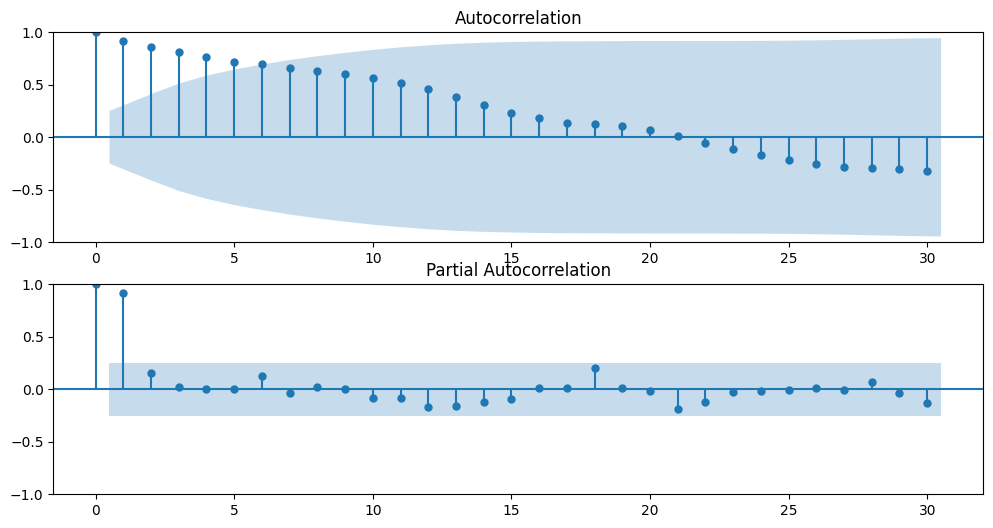

ADF Statistic: 0.704369250723779
p-value: 0.9899246633203046


In [17]:
# ACF y PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(df_apple['Close'], ax=plt.gca(), lags=30)
plt.subplot(212)
plot_pacf(df_apple['Close'], ax=plt.gca(), lags=30)
plt.show()

result = adfuller(df_apple['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


### Predict

In [18]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.1 MB/s eta 0:00:00


In [19]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
df_apple.set_index("Date", inplace=True)
train_data, test_data = train_test_split(df_apple['Close'], train_size=0.9)

# Search the model ARIMA óptim
model = pm.auto_arima(train_data,start_p=0,d=1,start_q=0,
          max_p=4,max_d=2,max_q=4, start_P=0,
          D=1, start_Q=0, max_P=2,max_D=1,
          max_Q=2, m=12, seasonal=True,
          error_action='warn',trace=True,
          supress_warnings=True,stepwise=True,
          random_state=20,n_fits=50)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=196.184, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=197.112, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=196.482, Time=0.18 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=195.139, Time=0.09 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=196.908, Time=0.40 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.66 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=194.537, Time=0.12 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=196.332, Time=0.34 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=1.47 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=196.492, Time=0.21 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.14 sec
 ARIMA(0,1,0)(0,1,1)[12] intercept   : AIC=196.452, Time=0.17 sec

Best model:  ARIMA(0,1,0)(0,1,1)[12]          
Total fit time: 4.974 seconds
                                      SARIMAX Results                                       
Dep. V

In [20]:
n_periods = len(test_data)
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


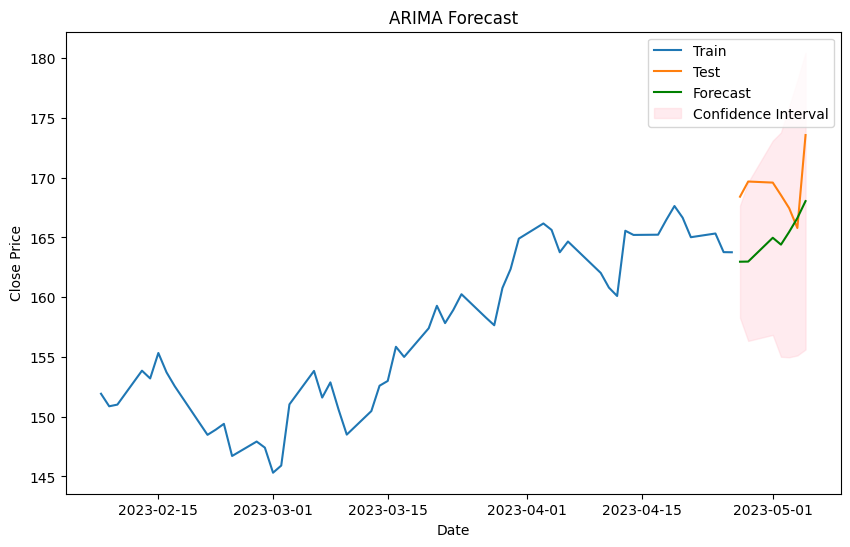

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, forecast, color='green', label='Forecast')
plt.fill_between(test_data.index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

**Thank you for reviewing this notebook!, share your feedback.**